# Project Name : Covid-19 twitte sentiment analysis and building ML model
### Author : Nosin Ibna Mahbub

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
#Importing all necessary libries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#loading dataset
data=pd.read_csv('/content/drive/My Drive/covid19 twitter sentiment analysis/main_dataset.csv',index_col=0)

In [6]:
data.head()

,user_id,screen_name,text
5,15872418.0,ABSCBNNews,G20 agrees to debt relief for poorest countrie...
7,171548670.0,RadioNLNews,B.C. health officials are urging people to kin...
9,23517017.0,953WDAE,The Lovely Lisa Ann Joins The Show LIVE From N...
10,613510703.0,matanock,@allisonnamias @ArriolaLR As @ethanbdm referen...
11,38489678.0,JAMA_current,Study suggests higher rates of co-infection be...


In [7]:
#droping all columns except text column
df=data.drop(['user_id','screen_name'], axis = 1) 

In [8]:
#reset the index
df.reset_index(inplace = True) 

In [9]:
df.drop(['index'],axis=1,inplace=True)

In [10]:
df.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,@allisonnamias @ArriolaLR As @ethanbdm referen...
4,Study suggests higher rates of co-infection be...


In [11]:
clean_data=df.iloc[:10000,:]

In [12]:
clean_data.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,@allisonnamias @ArriolaLR As @ethanbdm referen...
4,Study suggests higher rates of co-infection be...


In [13]:
#Clean text
#function for cleaning text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

clean_data['text']=clean_data['text'].apply(cleanText)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
clean_data.head()

,text
0,G20 agrees to debt relief for poorest countrie...
1,B.C. health officials are urging people to kin...
2,The Lovely Lisa Ann Joins The Show LIVE From N...
3,"As referenced, just saw this op-ed version ..."
4,Study suggests higher rates of co-infection be...


In [15]:
from textblob import TextBlob
from wordcloud import WordCloud

In [16]:
# Create a function to get subjectivity and polarity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

clean_data['Subjectivity']=clean_data['text'].apply(getSubjectivity)
clean_data['Polarity']=clean_data['text'].apply(getPolarity)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [17]:
clean_data.head()

,text,Subjectivity,Polarity
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000
1,B.C. health officials are urging people to kin...,0.900000,0.600000
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889


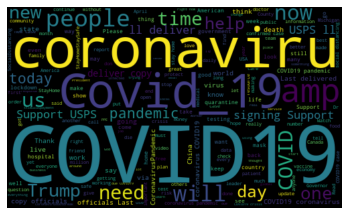

In [18]:
#Ploting Word cloud
allWords=''.join([twts for twts in clean_data['text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
clean_data['Analysis']=clean_data['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [20]:
clean_data.head()

,text,Subjectivity,Polarity,Analysis
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,Neutral
1,B.C. health officials are urging people to kin...,0.900000,0.600000,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534,Positive
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000,Neutral
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889,Negative


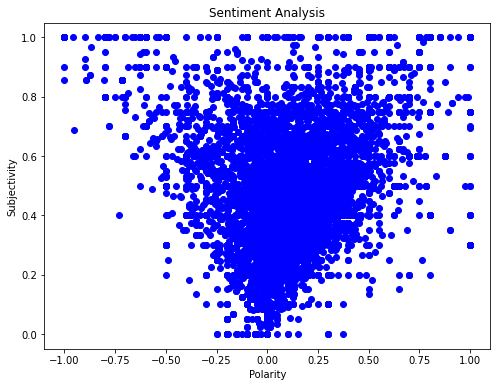

In [21]:
plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(clean_data['Polarity'],clean_data['Subjectivity'],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [22]:
# value counts
clean_data['Analysis'].value_counts()

Positive    4699
Neutral     3270
Negative    2031
Name: Analysis, dtype: int64

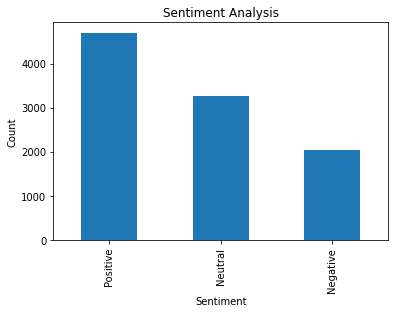

In [23]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
clean_data['Analysis'].value_counts().plot(kind='bar')
plt.show()

# Model buliding 

In [24]:
clean_data.head()

,text,Subjectivity,Polarity,Analysis
0,G20 agrees to debt relief for poorest countrie...,0.000000,0.000000,Neutral
1,B.C. health officials are urging people to kin...,0.900000,0.600000,Positive
2,The Lovely Lisa Ann Joins The Show LIVE From N...,0.625000,0.356534,Positive
3,"As referenced, just saw this op-ed version ...",0.000000,0.000000,Neutral
4,Study suggests higher rates of co-infection be...,0.347222,-0.013889,Negative


In [32]:
messages=clean_data[['text','Analysis']]

In [33]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [47]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

#one-hot-encoding for Analysis column
y=pd.get_dummies(messages['Analysis'])
y=y.iloc[:,1].values

In [48]:

# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [49]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
sentiment = MultinomialNB().fit(X_train, y_train)

y_pred=sentiment.predict(X_test)

# Finding Model accuracy for Naive bayes classifier

In [50]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_test)
confusion_m

array([[1330,    0],
       [   0,  670]])

In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7695

In [54]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)


Finding accuracy for svm 

In [59]:
#Finding accuracy for svm
accuracy_svm=accuracy_score(y_test,y_pred_svm)
print('Accuracy : ',accuracy_svm)

Accuracy :  0.8285


# Hyperparameter tuning for SVM


# Kernel SVM

## Polynomial Kernel

In [60]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
# Making prediction
y_pred_svm_pk = svclassifier.predict(X_test)

In [62]:
#Finding accuracy for Polynomial kernel
accuracy_svm_pk=accuracy_score(y_test,y_pred_svm_pk)
print('Accuracy : ',accuracy_svm_pk)

Accuracy :  0.71


# Comment 
From the above calculation we see that linear kernel Support Vector Machine gives more accuracy which is more than 82%.